In [1]:
from settings import *

random_rho0s: setting seed=74210


In [2]:
qubits = TriangularLayoutAB(m=1, cutoff=1, distance=0.9)
operations = [("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=5)

<Axes: title={'center': 'Qubit layout'}>

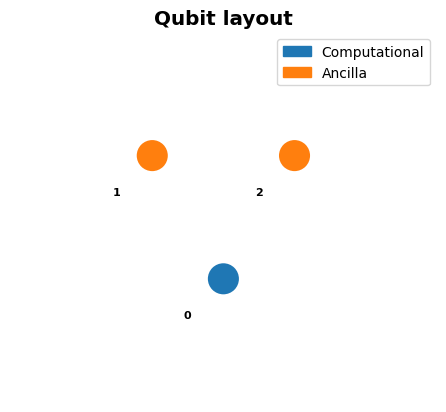

In [3]:
qubits.show_layout()

In [4]:
theta_opt, errors, thetas = optimize(circuit, training_data, max_count=100)

np.save("both_theta_opt", theta_opt)
np.save("both_thetas", thetas)
np.save("both_errors", errors)

optimizer (optimization indices): setting seed=35151


C:\Users\Admin\Desktop\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


Iteration: 0 
            Max gradient term: 0.013183038047107076 
            Current gradient: [-3.88365051e-03  0.00000000e+00  6.93889390e-14 -2.32751688e-03
 -1.04326098e-03 -1.04326098e-03 -1.37885860e-03  2.78752588e-03
  2.78752588e-03  1.28154033e-03 -1.37885860e-03  2.78752588e-03
  2.78752588e-03 -7.20627541e-03 -4.65399444e-03 -4.65399444e-03
 -1.50571772e-03  3.38916336e-03  3.38916336e-03  1.47737806e-04
 -1.50571772e-03  3.38916336e-03  3.38916336e-03 -1.69838488e-03
 -1.68550660e-03 -1.68550660e-03 -5.14166641e-03  1.82407232e-03
  1.82407232e-03 -6.49795224e-03 -5.14166641e-03  1.82407232e-03
  1.82407232e-03  9.83404635e-03  3.20288809e-03  3.20288809e-03
 -8.52940527e-03  3.35869725e-04  3.35869725e-04 -8.77516217e-03
 -8.52940527e-03  3.35869725e-04  3.35869725e-04  1.31830380e-02
  3.47649127e-03  3.47649127e-03 -8.18513252e-03  0.00000000e+00
  0.00000000e+00 -4.31187415e-04] 
            Current error: 0.08524407045458098 
            Current sigma values: (0, 1,

In [ ]:
theta_opt = np.load("both_theta_opt.npy")
thetas = np.load("both_thetas.npy")
errors = np.load("both_errors.npy")

rho_rand_haar: seed=10120


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

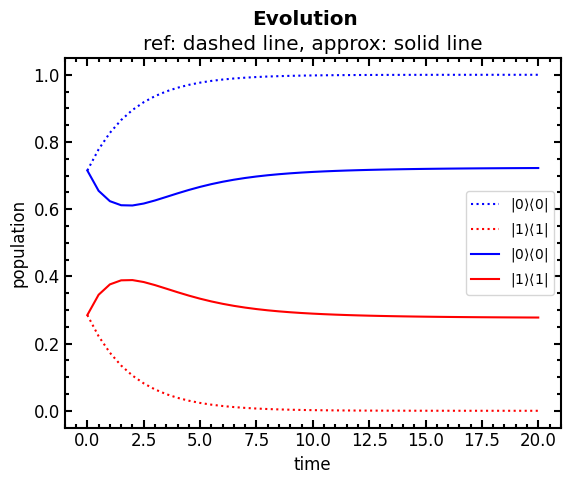

In [ ]:
rho0 = rho_rand_haar(1)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(40, rho0)

Os = [O.full() for O in create_observables_comp_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.5, N=40, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(1))

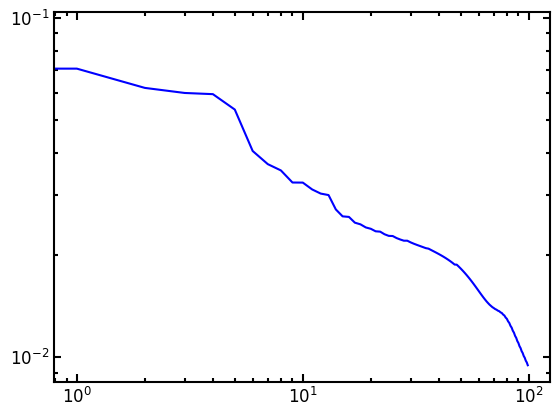

In [ ]:
plt.loglog(errors)